In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import multibind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = 'annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

/home/johanna/anaconda3/envs/multibind/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [3]:
df = mb.bindome.datasets.ProBound.ctcf()
df = df.sort_values(1, ascending=False).reset_index(drop=True)

AttributeError: type object 'ProBound' has no attribute 'ctcf'

In [4]:
df

,seq,0,1
0,TATTCCATGTAGACCGGCCATTGGACTATG,0,4
1,CCCTAGCGTTGATGGTATCGTAAGTGCGTC,0,4
2,TAATTAGTGGCTGCTTGTCGGAATGGGCAG,0,4
3,GAGGGGGCGTTACGCGTTGTGTAGACCTAA,0,4
4,AGGACCTCAGGTGGAATCTTTTTACTATTG,0,4
...,...,...,...
120091,ATATCAGAGAGACAGGACTTGTGACTTTGT,1,0
120092,ATATCAGAGGGCGTTCGAGGCTTGCTAGGC,1,0
120093,GGATGGGAGTGCCTTTTGGATGAAAGATTG,1,0
120094,GGATGGCTTGAGTAACCAAGGATTGCGTGG,1,0


In [8]:
n_rounds = 1
data = pd.read_csv('../data/countTable.0.CTCF_r3.tsv.gz', sep='\t', header=None)
data.columns = ['seq'] + [i for i in range(n_rounds+1)]
# data = data.sample(n=1000)
# data.index = range(len(data))
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [5]:
# data = df.head(1000)
data = df.sample(n=10000)
# data = df.copy()

In [6]:
set(data[0])

{0, 1, 2}

In [7]:
n_rounds = 1

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 5, 1

In [10]:
print('loading object (# entries)', data.shape[0])
dataset = mb.datasets.SelexDataset(data, n_rounds=n_rounds)
train = tdata.DataLoader(dataset=dataset, batch_size=10000, shuffle=True)

loading object (# entries) 10000


In [11]:
# train = tdata.DataLoader(dataset=dataset, batch_size=256, shuffle=True)

In [6]:
import numpy as np

# rounds 1
# batches 1
# enr_series True
next w 14
kernel to optimize 0

Freezing kernels
setting grad status of kernel at 0 to 1
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[0., 0.]], requires_grad=True)
activities
[[[1. 1.]
  [1. 1.]
  [1. 1.]]]


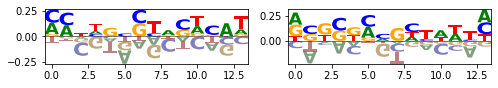

kernels mask [0, 1, 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 1
weight_decay= 0.01
dir weight 0.01
Epoch:  1, Loss: 0.8513 , best epoch: -1 secs per epoch: 1.153 s
Epoch: 11, Loss: 0.8491 , best epoch: 7 secs per epoch: 1.311 s
Epoch: 21, Loss: 0.8498 , best epoch: 14 secs per epoch: 1.256 s
Epoch: 31, Loss: 0.8500 , best epoch: 27 secs per epoch: 1.229 s
Epoch: 41, Loss: 0.8495 , best epoch: 27 secs per epoch: 1.221 s
Epoch: 51, Loss: 0.8502 , best epoch: 45 secs per epoch: 1.212 s
Epoch: 61, Loss: 0.8491 , best epoch: 45 secs per epoch: 1.205 s
Epoch: 71, Loss: 0.8504 , best epoch: 45 secs per epoch: 1.202 s
Epoch: 81, Loss: 0.8507 , best epoch: 45 secs per epoch: 1.199 s
Epoch: 91, Loss: 0.8486 , best epoch: 45 secs per epoch: 1.197 s
Epoch: 96, Loss: 0.8494 , best epoch: 45 secs per epoch: 1.196 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 0.1542, -0.1542]], requires_grad=True

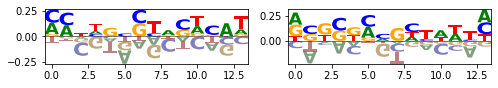

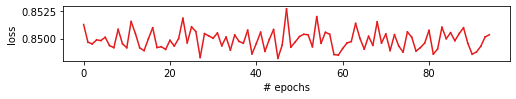

after shift optimz model
log_etas
Parameter containing:
tensor([[ 0.1542, -0.1542]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.         1.        ]
  [1.         1.        ]]]


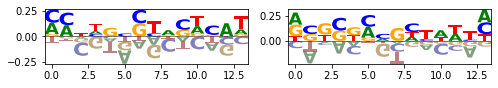

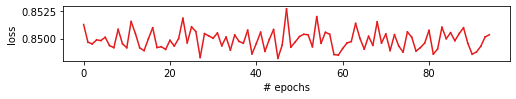


kernel to optimize 1

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 1
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 0
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 0.1542, -0.1542]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.         1.        ]
  [1.         1.        ]]]


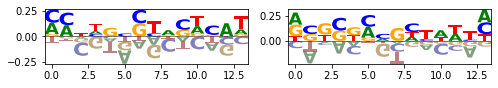

kernels mask [0, 0, 1]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.1
weight_decay= 0.01
dir weight 0.01
Epoch:  1, Loss: 1.6270 , best epoch: -1 secs per epoch: 3.532 s
Epoch: 11, Loss: 1.6228 , best epoch: 3 secs per epoch: 3.805 s
Epoch: 21, Loss: 1.6234 , best epoch: 13 secs per epoch: 3.702 s
Epoch: 31, Loss: 1.6238 , best epoch: 13 secs per epoch: 3.666 s
Epoch: 41, Loss: 1.6224 , best epoch: 32 secs per epoch: 3.649 s
Epoch: 51, Loss: 1.6231 , best epoch: 32 secs per epoch: 3.599 s
Epoch: 61, Loss: 1.6225 , best epoch: 56 secs per epoch: 3.598 s
Epoch: 71, Loss: 1.6239 , best epoch: 56 secs per epoch: 3.584 s
Epoch: 81, Loss: 1.6228 , best epoch: 56 secs per epoch: 3.576 s
Epoch: 91, Loss: 1.6237 , best epoch: 56 secs per epoch: 3.585 s
Epoch: 101, Loss: 1.6228 , best epoch: 56 secs per epoch: 3.546 s
Epoch: 107, Loss: 1.6222 , best epoch: 56 secs per epoch: 3.539 s
early stop!
after kernel opt / before shift optim.
log_etas


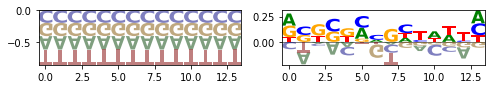

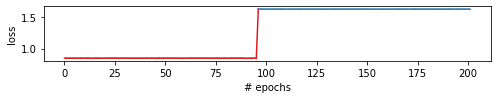

after shift optimz model
log_etas
Parameter containing:
tensor([[ 0.8718, -0.8718]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.0000082  0.47241837]
  [1.         1.        ]]]


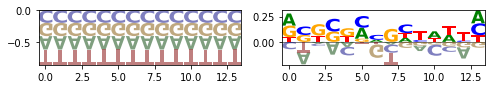

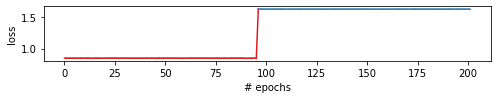


kernel to optimize 2

Freezing kernels
setting grad status of kernel at 0 to 0
setting grad status of kernel at 1 to 0
mono grad 1 None
di grad 1 None
setting grad status of kernel at 2 to 1
mono grad 2 None
di grad 2 None


before kernel optimization.
log_etas
Parameter containing:
tensor([[ 0.8718, -0.8718]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.0000082  0.47241837]
  [1.         1.        ]]]


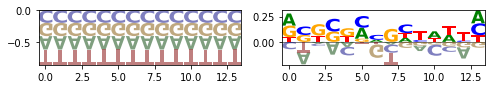

kernels mask [0, 0, 0]
optimizing using <class 'torch.optim.adam.Adam'> and <class 'multibind.tl.loss.PoissonLoss'>
lr= 0.1
weight_decay= 0.01
dir weight 0.01
Epoch:  1, Loss: 1.6244 , best epoch: -1 secs per epoch: 4.385 s
Epoch: 11, Loss: 1.6225 , best epoch: 4 secs per epoch: 4.960 s
Epoch: 21, Loss: 1.6224 , best epoch: 4 secs per epoch: 4.724 s
Epoch: 31, Loss: 1.6224 , best epoch: 27 secs per epoch: 4.596 s
Epoch: 41, Loss: 1.6226 , best epoch: 27 secs per epoch: 4.576 s
Epoch: 51, Loss: 1.6222 , best epoch: 27 secs per epoch: 4.604 s
Epoch: 61, Loss: 1.6227 , best epoch: 27 secs per epoch: 4.561 s
Epoch: 71, Loss: 1.6222 , best epoch: 27 secs per epoch: 4.542 s
Epoch: 78, Loss: 1.6225 , best epoch: 27 secs per epoch: 4.556 s
early stop!
after kernel opt / before shift optim.
log_etas
Parameter containing:
tensor([[ 1.0805, -1.0805]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.0000082  0.47241837]
  [0.99952185 0.48406506]]]


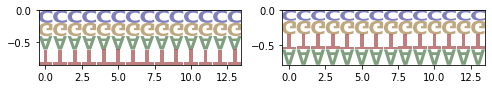

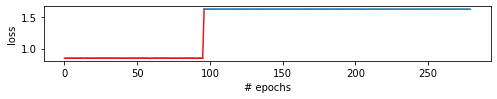

after shift optimz model
log_etas
Parameter containing:
tensor([[ 1.0805, -1.0805]], requires_grad=True)
activities
[[[1.0003799  0.85706997]
  [1.0000082  0.47241837]
  [0.99952185 0.48406506]]]


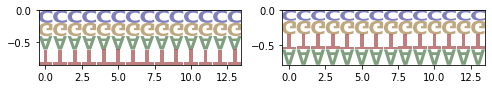

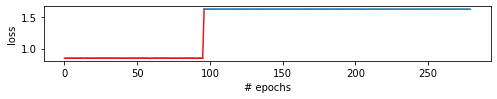


done....


In [11]:
# assign batch and data type

# data['batch'] = 0
# data['is_count_data'] = 1
# n_batches=3

dirichlet_regularization_log = -2
# for dirichlet_regularization_log in range(-5, 3):

from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 1
model_by_k_next, res_next = mb.tl.train_iterative(train, device, min_w=14, show_logo=True, optimize_motif_shift=False,
                                                  dirichlet_regularization=10 ** dirichlet_regularization_log,
                                                  lr=[1, 0.1, 0.1], weight_decay=[0.01, 0.01, 0.01],
                                                  num_epochs=1000, early_stopping=50, use_dinuc=False, # optimiser=torch.optim.LBFGS,
                                                  max_w=15, n_kernels=3, log_each=10) #  seed=seed) # seeds.index[0]) # 
print('done....')
# res = []
# model_by_k = {}
